## Estudios de Modelos Análiticos

In [12]:
# ======================================================
# 1. Importar librerías necesarias
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [13]:
# ======================================================
# 2. Configurar la ruta y la hoja del Excel
# ======================================================
# Ruta del archivo:
file_path = "Planta_Solar_Colombia_V3.xlsx"
sheet_name = "El_Espinal"  # Nombre del archivo tratado

In [14]:
# ======================================================
# 3. Cargar los datos desde el Excel
# ======================================================
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [15]:
# ======================================================
# 4. Limpieza de datos
# ======================================================
# Reemplazar "invalid" por NaN
df.replace("invalid", np.nan, inplace=True)

# Columnas que se convertirán a numérico
cols_to_numeric = [
    'M1_POA_IRR (W/m2)', 
    'M1_Temp_Cell (°C)', 
    'M1_Temp_Air (°C)',
    'M2_Temp_Cell (°C)', 
    'M2_POA_IRR (W/m2)', 
    'Energía Generada(kWh)'
]

# Convertir a numérico y forzar a NaN los valores que no se puedan parsear
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filtrar filas donde la irradiancia sea mayor a 100 W/m2
df = df[df['M1_POA_IRR (W/m2)'] > 100]

# Eliminar filas con valores nulos en las columnas importantes
df.dropna(subset=cols_to_numeric, inplace=True)

# Inspeccionar las primeras filas
print("Primeras filas después de limpiar:")
print(df.head())


Primeras filas después de limpiar:
                  Date      Nombre   Provincia    País  Energía Generada(kWh)  \
31 2024-06-01 07:45:00  El Espinal  Los Santos  Panamá                    233   
32 2024-06-01 08:00:00  El Espinal  Los Santos  Panamá                    332   
33 2024-06-01 08:15:00  El Espinal  Los Santos  Panamá                    387   
34 2024-06-01 08:30:01  El Espinal  Los Santos  Panamá                    461   
35 2024-06-01 08:45:01  El Espinal  Los Santos  Panamá                    567   

      INV_A_E    INV_B_E    INV_C_E    INV_D_E    INV_E_E    INV_F_E  \
31  38.833333  38.833333  38.833333  38.833333  38.833333  38.833333   
32  55.333333  55.333333  55.333333  55.333333  55.333333  55.333333   
33  64.500000  64.500000  64.500000  64.500000  64.500000  64.500000   
34  76.833333  76.833333  76.833333  76.833333  76.833333  76.833333   
35  94.500000  94.500000  94.500000  94.500000  94.500000  94.500000   

    M1_Temp_Cell (°C)  M1_Temp_Air (°C)  M1_P

###  Eleccción del metodo feacture

Se utilizó el método SelectKBest con f_regression porque permite seleccionar las variables más relevantes para predecir la energía generada (kWh), reduciendo la dimensionalidad del dataset y eliminando características irrelevantes o redundantes. f_regression evalúa la relación estadística entre cada variable y la variable objetivo mediante pruebas F, asegurando que solo se incluyan aquellas con mayor impacto. Esto mejora la eficiencia computacional, evita el sobreajuste y facilita la interpretación del modelo, garantizando que se entrene con datos realmente útiles.

In [16]:
# ======================================================
# 5. Definir X (features) e y (target)
# ======================================================
features = [
    'M1_POA_IRR (W/m2)', 
    'M1_Temp_Cell (°C)', 
    'M1_Temp_Air (°C)',
    'M2_Temp_Cell (°C)', 
    'M2_POA_IRR (W/m2)'
]
target = 'Energía Generada(kWh)'

X = df[features]
y = df[target]

In [17]:
# ======================================================
# 6. Selección de características (Feature Selection)
# ======================================================
k = 3  # Se elige cuántas columnas conservar
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

mask = selector.get_support()
selected_features = np.array(features)[mask]
print(f"\nLas {k} características seleccionadas son:", selected_features)


Las 3 características seleccionadas son: ['M1_POA_IRR (W/m2)' 'M2_Temp_Cell (°C)' 'M2_POA_IRR (W/m2)']


In [19]:
# ======================================================
# 7. Dividir datos en entrenamiento y prueba
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)


### Elección del algoritmo de regresión o clasificación
Se utilizó LinearRegression porque es un modelo simple y eficiente para predecir energía generada (kWh) en función de variables como irradiancia y temperatura. Ajusta una relación lineal entre las variables, permitiendo interpretar el impacto de cada una y obteniendo un modelo rápido y fácil de entrenar.

In [20]:

# ======================================================
# 8. Entrenar el modelo de regresión
# ======================================================
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Cálculo de metricas básicas para validar el modelo


In [21]:

# ======================================================
# 9. Hacer predicciones y calcular métricas
# ======================================================
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMétricas del modelo:")
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)



Métricas del modelo:
MSE: 24679.578270819067
MAE: 104.93638184705144
R²: 0.7622538697555714


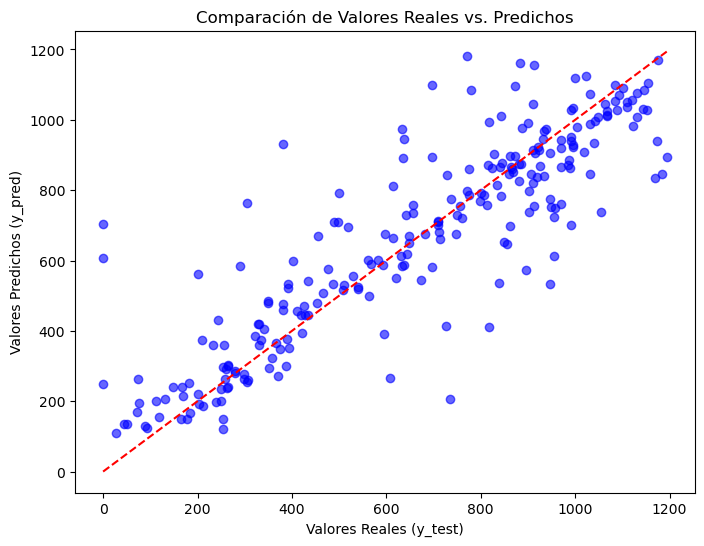

In [22]:
# ======================================================
# 10. Visualizar valores reales vs. predichos
# ======================================================
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.title("Comparación de Valores Reales vs. Predichos")
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (y_pred)")

# Línea ideal y=x
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.show()


## Concluciones con base en los resultados obtenidos

Las características más relevantes para predecir la energía generada (kWh) fueron seleccionadas mediante SelectKBest, lo que permitió reducir la dimensionalidad y mejorar la eficiencia del modelo.

El coeficiente de determinación (R²) obtenido fue 0.76, lo que indica que el modelo explica aproximadamente el 76% de la variabilidad en la energía generada a partir de las variables seleccionadas (irradiancia y temperatura). Aunque es un buen resultado, aún hay un 24% de variabilidad que no está explicada, lo que sugiere que otros factores podrían influir en la generación de energía.

El error absoluto medio (MAE) es de aproximadamente 105 kWh, lo que significa que, en promedio, el modelo comete un error de 105 kWh en sus predicciones. 

El error cuadrático medio (MSE) es 24,679, lo que indica que hay valores con errores grandes que pueden estar afectando la precisión del modelo. 

El gráfico de valores reales vs. predichos muestra una tendencia positiva alineada con la diagonal (línea roja), lo que indica que el modelo sigue correctamente la relación esperada entre las variables. Sin embargo, algunos puntos dispersos sugieren que el modelo podría beneficiarse de una mejor selección de características o ajustes adicionales.